In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [2]:
 # Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='8a0bd0e56e474e2eb20a84ea689732b1')

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")

In [5]:
bitcoin_news["totalResults"]

6571

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en")
ethereum_news["totalResults"]

2969

In [7]:
 # Create the Bitcoin sentiment scores DataFrame

# Function for df
def df_maker(news, language):
    articles = []
    for article in news:
        try:
            sentiment = analyzer.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "Title": title,
                "Description": description,
                "Text": text,
                "Date": date,
                "Compound": sentiment["compound"],
                "Positive": sentiment["pos"],
                "Negative": sentiment["neg"],
                "Neutral": sentiment["neu"],
            })
            
            cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)[cols]


# Making df
bitcoin_df = df_maker(bitcoin_news["articles"],"en")

# .head() of df
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.0900,0.228,0.563,0.208,When my wife started a little garden in our ur...
1,0.4215,0.000,0.915,0.085,PayPal will now allow users outside the U.S. t...
2,0.0000,0.000,1.000,0.000,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
3,0.7717,0.000,0.820,0.180,Retailers are increasingly accepting cryptocur...
4,0.6908,0.000,0.868,0.132,"PayPal is bringing the ability to buy, hold an..."


In [8]:
# Create the ethereum sentiment scores DataFrame

ethereum_df = df_maker(ethereum_news["articles"],"en")

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.2411,0.049,0.951,0.000,Blockchain infrastructure startups are heating...
1,0.8047,0.000,0.792,0.208,Cent was founded in 2017 as an ad-free creator...
2,0.4215,0.000,0.915,0.085,PayPal will now allow users outside the U.S. t...
3,0.5719,0.000,0.887,0.113,"After the bell today, Coinbase reported anothe..."
4,0.6908,0.000,0.868,0.132,"PayPal is bringing the ability to buy, hold an..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.129110,0.053950,0.85965,0.086350
std,0.396074,0.090599,0.13193,0.081847
min,-0.670500,0.000000,0.56300,0.000000
25%,-0.022500,0.000000,0.79800,0.000000
50%,0.088950,0.000000,0.88750,0.086000
75%,0.421500,0.060250,0.95200,0.133750
max,0.771700,0.268000,1.00000,0.278000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.186070,0.021650,0.910000,0.068300
std,0.390238,0.049823,0.071125,0.064164
min,-0.670500,0.000000,0.783000,0.000000
25%,0.000000,0.000000,0.864750,0.000000
50%,0.212000,0.000000,0.897000,0.086000
75%,0.469375,0.000000,1.000000,0.110000
max,0.804700,0.164000,1.000000,0.208000


In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words("english"))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for bitcoin
btc_tokens = []
for i in bitcoin_df['Text']:
    tokenized_text = tokenizer(i)
    btc_tokens.append({'tokens':tokenized_text})

btc_tokens_df = pd.DataFrame(btc_tokens)
bitcoin_df['tokens'] = btc_tokens_df
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.0900,0.228,0.563,0.208,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.4215,0.000,0.915,0.085,PayPal will now allow users outside the U.S. t...,"[paypal, allow, user, outside, us, buy, hold, ..."
2,0.0000,0.000,1.000,0.000,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[photo, joe, raedlegetty, images, twitter, squ..."
3,0.7717,0.000,0.820,0.180,Retailers are increasingly accepting cryptocur...,"[retailers, increasingly, accepting, cryptocur..."
4,0.6908,0.000,0.868,0.132,"PayPal is bringing the ability to buy, hold an...","[paypal, bringing, ability, buy, hold, sell, c..."


In [14]:
# Create a new tokens column for ethereum
ethereum_df['Text'] = str(ethereum_df['Text'])

eth_tokens = []
for i in ethereum_df['Text']:
    tokenized_text = tokenizer(i)
    eth_tokens.append({'tokens':tokenized_text})

eth_tokens_df = pd.DataFrame(eth_tokens)
ethereum_df['tokens'] = eth_tokens_df
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.2411,0.049,0.951,0.000,0 Blockchain infrastructure startups are h...,"[blockchain, infrastructure, startup, heating,..."
1,0.8047,0.000,0.792,0.208,0 Blockchain infrastructure startups are h...,"[blockchain, infrastructure, startup, heating,..."
2,0.4215,0.000,0.915,0.085,0 Blockchain infrastructure startups are h...,"[blockchain, infrastructure, startup, heating,..."
3,0.5719,0.000,0.887,0.113,0 Blockchain infrastructure startups are h...,"[blockchain, infrastructure, startup, heating,..."
4,0.6908,0.000,0.868,0.132,0 Blockchain infrastructure startups are h...,"[blockchain, infrastructure, startup, heating,..."


In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = " ".join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(15))
    return pd.DataFrame(list(top_15.items()), columns=['word','count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
corpus = bitcoin_df["Text"]
bigram_counter(corpus)

,word,count
0,"(char, paypal)",3
1,"(buy, hold)",3
2,"(hold, sell)",3
3,"(aug, reuters)",3
4,"(paypal, allow)",2
5,"(allow, user)",2
6,"(first, time)",2
7,"(allow, customer)",2
8,"(sell, cryptocurrencies)",2
9,"(char, joe)",2


In [18]:
# Generate the Ethereum N-grams where N=2

corpus = ethereum_df["Text"]
bigram_counter(corpus)

,word,count
0,"(aug, reuters)",40
1,"(blockchain, infrastructure)",20
2,"(infrastructure, startup)",20
3,"(startup, heating)",20
4,"(heating, cent)",20
5,"(cent, wa)",20
6,"(wa, founded)",20
7,"(founded, adfree)",20
8,"(adfree, creator)",20
9,"(creator, paypal)",20


In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
btc_words = []
for text in bitcoin_df['tokens']:
    for word in text:
        btc_words.append(word)
        
token_count(btc_words)

[('char', 20),
 ('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('reuters', 5),
 ('allow', 4),
 ('data', 4),
 ('paypal', 3),
 ('buy', 3)]

In [21]:
# Get the top 10 words for Ethereum
eth_words = []
for text in ethereum_df['tokens']:
    for word in text:
        eth_words.append(word)
        
token_count(eth_words)

[('ethereum', 80),
 ('ether', 60),
 ('paypal', 40),
 ('cryptocurrency', 40),
 ('aug', 40),
 ('reuters', 40),
 ('representations', 40),
 ('blockchain', 20),
 ('infrastructure', 20),
 ('startup', 20)]

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

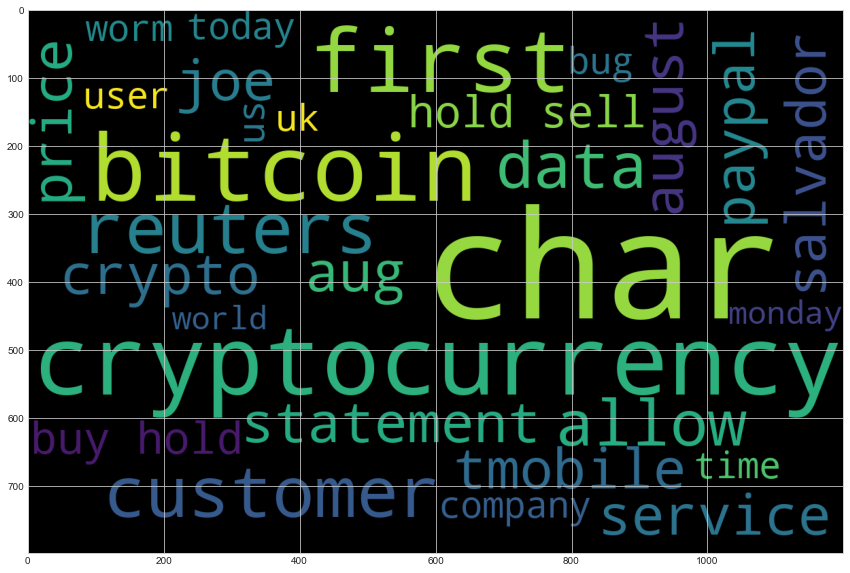

In [23]:
# Generate the Bitcoin word cloud
def stringmaker(words):
    big_string = " ".join(words)
    return big_string

btc_words = stringmaker(btc_words)
eth_words = stringmaker(eth_words)

btc_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(btc_words)

plt.imshow(btc_word_cloud)

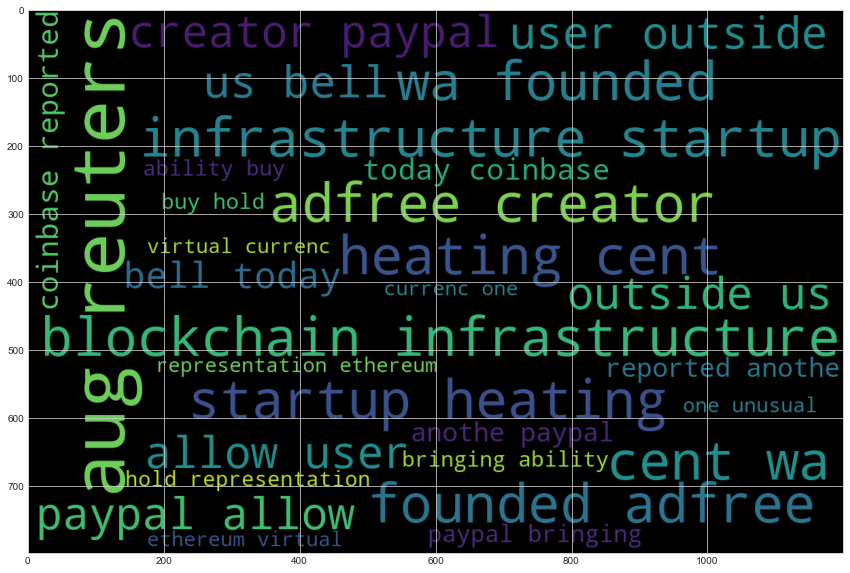

In [24]:
# Generate the Ethereum word cloud

eth_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(eth_words)

plt.imshow(eth_word_cloud)

In [25]:
import spacy
from spacy import displacy

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [28]:
# Concatenate all of the bitcoin text together
articles = bitcoin_df["Text"].str.cat()
articles

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year 

In [29]:
# Run the NER processor on all of the text
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
for ent in doc.ents:
    print (ent, ent.label_)

U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
Joe PERSON
UK GPE
first ORDINAL
four CARDINAL
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug PERSON
20 CARDINAL
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 GMT TIME
Friday DATE
+416 chars]T-Mobile PERSON
Motherboard PERSON
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GP

In [32]:
# Concatenate all of the bitcoin text together
articles = ethereum_df["Text"].str.cat()
articles

'0     Blockchain infrastructure startups are heating...\n1     Cent was founded in 2017 as an ad-free creator...\n2     PayPal will now allow users outside the U.S. t...\n3     After the bell today, Coinbase reported anothe...\n4     PayPal is bringing the ability to buy, hold an...\n5     Representation of the Ethereum virtual currenc...\n6     One of the most unusual cryptocurrency heists ...\n7     HONG KONG, Aug 5 (Reuters) - Ether held near t...\n8     Representations of cryptocurrencies Bitcoin an...\n9     Vitalik Buterin, founder of ethereum, during T...\n10    Justin Sullivan/Getty Images\\r\\nCitigroup is a...\n11    By Mary-Ann RussonBusiness reporter, BBC News\\...\n12    LONDON, Aug 25 (Reuters) - Tags for identifyin...\n13    Representations of cryptocurrency Ethereum are...\n14    PayPal\xa0launched its crypto services in the UKi...\n15    More than $144 million worth of ether has been...\n16    The ethereum network runs the ether cryptocurr...\n17    All the sessions f

In [33]:
# Run the NER processor on all of the text
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print (ent, ent.label_)